In [117]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import os


In [ ]:
1.	Find the highest rated movie in the “Quest” story type.

In [2]:
data=pd.read_csv('C:\\Users\\Simran\\Downloads\\Dataset\\HollywoodMovies.csv')

In [3]:
data

,Movie,LeadStudio,RottenTomatoes,AudienceScore,Story,Genre,TheatersOpenWeek,OpeningWeekend,BOAvgOpenWeekend,DomesticGross,ForeignGross,WorldGross,Budget,Profitability,OpenProfit,Year
0,Spider-Man 3,Sony,61.0,54.0,Metamorphosis,Action,4252.0,151.10,35540.0,336.53,554.34,890.87,258.0,345.30,58.57,2007
1,Shrek the Third,Paramount,42.0,57.0,Quest,Animation,4122.0,121.60,29507.0,322.72,476.24,798.96,160.0,499.35,76.00,2007
2,Transformers,Paramount,57.0,89.0,Monster Force,Action,4011.0,70.50,17577.0,319.25,390.46,709.71,150.0,473.14,47.00,2007
3,Pirates of the Caribbean: At World's End,Disney,45.0,74.0,Rescue,Action,4362.0,114.70,26302.0,309.42,654.00,963.42,300.0,321.14,38.23,2007
4,Harry Potter and the Order of the Phoenix,Warner Bros,78.0,82.0,Quest,Adventure,4285.0,77.10,17998.0,292.00,647.88,939.89,150.0,626.59,51.40,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,The Canyons,IFC,22.0,NaN,NaN,NaN,1.0,0.01,13351.0,0.06,0.14,0.19,NaN,77.21,NaN,2013
966,The Call,TriStar,43.0,66.0,NaN,NaN,2507.0,17.12,6828.0,51.87,16.70,68.57,13.0,527.48,131.69,2013
967,The English Teacher,Cinedigm Entertainment,42.0,NaN,NaN,NaN,2.0,0.01,3001.0,0.10,0.06,0.10,NaN,NaN,NaN,2013
968,John Dies at the End,Magnolia,61.0,53.0,NaN,NaN,1.0,0.01,12467.0,0.14,NaN,0.14,1.0,14.20,1.00,2013


In [4]:
data.columns

Index(['Movie', 'LeadStudio', 'RottenTomatoes', 'AudienceScore', 'Story',
       'Genre', 'TheatersOpenWeek', 'OpeningWeekend', 'BOAvgOpenWeekend',
       'DomesticGross', 'ForeignGross', 'WorldGross', 'Budget',
       'Profitability', 'OpenProfit', 'Year'],
      dtype='object')

In [34]:
highest_rated_movie=""
rating=0
for i in range(0,970):
    if data.loc[i]['Story'] in ('Quest','quest') and data.loc[i]['AudienceScore']>rating:
        rating =data.loc[i]['AudienceScore']
        highest_rated_movie=data.loc[i]['Movie']
print(rating,'-',highest_rated_movie)


90.0 - Into the Wild


In [ ]:
2.	Find the genre in which there has been the greatest number of movie releases
Genre and number of movies in each Genre

In [46]:
data.groupby('Genre').size().sort_values(ascending=False)

Genre
Comedy         177
Action         166
Drama          109
Horror          52
Animation       51
Thriller        35
Adventure       30
Romance         20
Crime           15
Biography       14
Documentary      7
Fantasy          6
Mystery          5
Musical          4
dtype: int64

In [37]:
genre = data.loc[:, ["Genre"]]

frequency = dict()
for i in range(0, 970):
    if genre.loc[i][0] in frequency:
        frequency[str(genre.loc[i][0])] += 1
    else:
        frequency[str(genre.loc[i][0])] = 1
print(frequency)

{'Action': 166, 'Animation': 51, 'Adventure': 30, 'Thriller': 35, 'Comedy': 177, 'Musical': 4, 'Drama': 109, 'Biography': 14, 'Horror': 52, 'Romance': 20, 'Fantasy': 6, 'Documentary': 7, 'Crime': 15, 'nan': 1, 'Mystery': 5}


C:\Users\Simran\AppData\Local\Temp\ipykernel_20352\660439629.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if genre.loc[i][0] in frequency:
C:\Users\Simran\AppData\Local\Temp\ipykernel_20352\660439629.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  frequency[str(genre.loc[i][0])] = 1
C:\Users\Simran\AppData\Local\Temp\ipykernel_20352\660439629.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  frequency[str(genre.loc[i][0

In [38]:
frequency_sorted = sorted(frequency.items(), key=lambda x: x[1], reverse=True)

In [40]:
for i in frequency_sorted:
	print(i[0],'-' ,i[1])

Comedy - 177
Action - 166
Drama - 109
Horror - 52
Animation - 51
Thriller - 35
Adventure - 30
Romance - 20
Crime - 15
Biography - 14
Documentary - 7
Fantasy - 6
Mystery - 5
Musical - 4
nan - 1


In [ ]:
3.	Print the names of the top five movies with the costliest budgets.

In [53]:
data[['Movie','Budget']].sort_values(by='Budget',ascending=False).head(5)

,Movie,Budget
3,Pirates of the Caribbean: At World's End,300.0
468,Tangled,260.0
0,Spider-Man 3,258.0
778,The Dark Knight Rises,250.0
241,Harry Potter and the Half-Blood Prince,250.0


# 4.	Is there any correspondence between the critics’ evaluation of a movie and its acceptance by the public? Find out, by plotting the net profitability of a movie against the ratings it receives on Rotten Tomatoes.

In [55]:
data.columns

Index(['Movie', 'LeadStudio', 'RottenTomatoes', 'AudienceScore', 'Story',
       'Genre', 'TheatersOpenWeek', 'OpeningWeekend', 'BOAvgOpenWeekend',
       'DomesticGross', 'ForeignGross', 'WorldGross', 'Budget',
       'Profitability', 'OpenProfit', 'Year'],
      dtype='object')

(0.0, 200.0)

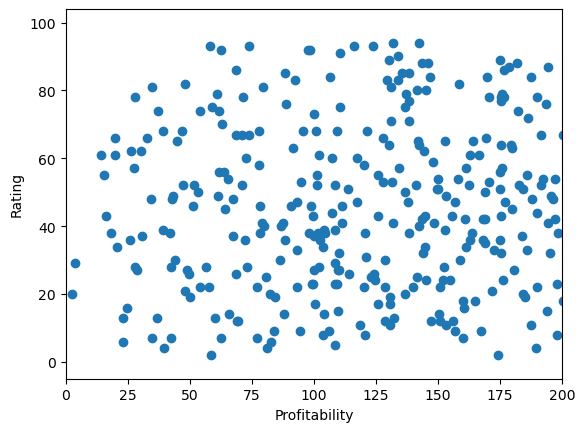

In [62]:
plt.scatter(data=data,x='Profitability',y='RottenTomatoes')
plt.xlabel('Profitability')
plt.ylabel('Rating')
plt.xlim(0,200)

# 5.1 From the raw data below create a data frame

'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],

'last_name': ['Miller', 'Jacobson', ".", 'Milner', 'Cooze'],

'age': [42, 52, 36, 24, 73],

'preTestScore': [4, 24, 31, ".", "."],

'postTestScore': ["25,000", "94,000", 57, 62, 70]


In [63]:
raw={'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
'last_name': ['Miller', 'Jacobson', ".", 'Milner', 'Cooze'],
'age': [42, 52, 36, 24, 73],
'preTestScore': [4, 24, 31, ".", "."],
'postTestScore': ["25,000", "94,000", 57, 62, 70]}

In [67]:
x=pd.DataFrame(raw)
x

,first_name,last_name,age,preTestScore,postTestScore
0,Jason,Miller,42,4,"25,000"
1,Molly,Jacobson,52,24,"94,000"
2,Tina,.,36,31,57
3,Jake,Milner,24,.,62
4,Amy,Cooze,73,.,70


# 5.2: Save the dataframe into a csv file as example.csv

In [74]:
example=x.to_csv('C:\\Users\\Simran\\Downloads\\Dataset\\example.csv')

# 5.3: Read the example.csv and print the data frame

In [75]:
pd.read_csv('C:\\Users\\Simran\\Downloads\\Dataset\\example.csv')

,Unnamed: 0,first_name,last_name,age,preTestScore,postTestScore
0,0,Jason,Miller,42,4,"25,000"
1,1,Molly,Jacobson,52,24,"94,000"
2,2,Tina,.,36,31,57
3,3,Jake,Milner,24,.,62
4,4,Amy,Cooze,73,.,70


In [ ]:
5.4: Read the example.csv without column heading

In [76]:
pd.read_csv('C:\\Users\\Simran\\Downloads\\Dataset\\example.csv',header=None)

,0,1,2,3,4,5
0,NaN,first_name,last_name,age,preTestScore,postTestScore
1,0.0,Jason,Miller,42,4,"25,000"
2,1.0,Molly,Jacobson,52,24,"94,000"
3,2.0,Tina,.,36,31,57
4,3.0,Jake,Milner,24,.,62
5,4.0,Amy,Cooze,73,.,70


# 5.5: Read the example.csv and make the index columns as 'First Name’ and 'Last Name'

In [77]:
pd.read_csv('C:\\Users\\Simran\\Downloads\\Dataset\\example.csv',index_col=['first_name','last_name'])

,,Unnamed: 0,age,preTestScore,postTestScore
first_name,last_name,,,,
Jason,Miller,0,42,4,"25,000"
Molly,Jacobson,1,52,24,"94,000"
Tina,.,2,36,31,57
Jake,Milner,3,24,.,62
Amy,Cooze,4,73,.,70


In [ ]:
5.6: Print the data frame in a Boolean form as True or False. True for Null/ NaN values and false for non-null values

In [81]:
pd.read_csv('C:\\Users\\Simran\\Downloads\\Dataset\\example.csv',na_values='.')

,Unnamed: 0,first_name,last_name,age,preTestScore,postTestScore
0,0,Jason,Miller,42,4.0,"25,000"
1,1,Molly,Jacobson,52,24.0,"94,000"
2,2,Tina,NaN,36,31.0,57
3,3,Jake,Milner,24,NaN,62
4,4,Amy,Cooze,73,NaN,70


# 5.7: Read the dataframe by skipping first 3 rows and print the data frame

In [83]:
pd.read_csv('C:\\Users\\Simran\\Downloads\\Dataset\\example.csv',skiprows=3)

,2,Tina,.,36,31,57
0,3,Jake,Milner,24,.,62
1,4,Amy,Cooze,73,.,70


# 5.8: Load a csv file while interpreting "," in strings around numbers as thousands seperators. Check the raw data 'postTestScore' column has, as thousands separator. Comma should be ignored while reading the data. It is default behaviour, but you need to give argument to read_csv function which makes sure commas are ignored.

In [84]:
pd.read_csv('C:\\Users\\Simran\\Downloads\\Dataset\\example.csv',thousands=',')

,Unnamed: 0,first_name,last_name,age,preTestScore,postTestScore
0,0,Jason,Miller,42,4,25000
1,1,Molly,Jacobson,52,24,94000
2,2,Tina,.,36,31,57
3,3,Jake,Milner,24,.,62
4,4,Amy,Cooze,73,.,70
